<a href="https://www.oguzerdogan.com/">
    <img src="https://www.oguzerdogan.com/wp-content/uploads/2020/10/logo_oz.png" width="200" align="right">
</a>

<center><h1><strong>Fiyatlandırma Projesi</strong></h1>
<img
src="https://www.oguzerdogan.com/wp-content/uploads/2020/11/pricing.png">
</center>

<div class="alert alert-block alert-info" style="margin-top: 20px">

<p>Bir oyun şirketi bir oyununda kullanıcılarına item satın alımları için hediye paralar vermiştir.</p>
<p>Kullanıcılar bu sanal paraları kullanarak karakterlerine çeşitli araçlar satın almaktadır.</p>
<p>Oyun şirketi bir item için fiyat belirtmemiş ve kullanıcılardan bu item&#39;ı istedikleri fiyattan almalarını sağlamış.</p>
<p>Örneğin kalkan isimli item için kullanıcılar kendi uygun gördükleri miktarları ödeyerek bu kalkanı satın alacaklar.</p>
<p>Örneğin bir kullanıcı kendisine verilen sanal paralardan 30 birim, diğer kullanıcı 45 birim ile ödeme yapabilir.</p>
<p>Dolayısıyla kullanıcılar kendilerine göre ödemeyi göze aldıkları miktarlar ile bu item&#39;ı satın alabilirler.</p>
 
</div>

<div class="alert alert-danger" role="alert">
<h1>Çözülmesi gereken problemler:</h1>
<ul>
<li><ol>
<li>Item&#39;in fiyatı kategorilere göre farklılık göstermekte midir? <b>İstatistiki olarak ifade ediniz.</b></li>

</ol>
</li>
<li><ol start='2' >
<li>İlk soruya bağlı olarak <b>item&#39;ın fiyatı ne olmalıdır?</b> Nedenini açıklayınız?</li>

</ol>
</li>
<li><ol start='3' >
<li>Fiyat konusunda &quot;hareket edebilir olmak&quot; istenmektedir. Fiyat stratejisi için <b>karar destek sistemi</b> oluşturunuz ve</li>

</ol>
</li>
<li><ol start='4' >
<li>Olası fiyat değişiklikleri için item satın almalarını ve gelirlerini simüle ediniz.</li>

</ol>
</li>

</ul>
<p>&nbsp;</p>
</div>

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #C20E69; font-family: 'Poppins'} 
h2, h3 {color: #25B89B; font-family: 'Poppins';}
h4 {color: #818286; font-family: 'Roboto';}
                                      
</style>

# &#128217; Gerekli Kütüphaneler

In [2]:
#Main
#-----------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Stats
#-----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.stats.api as sms
import itertools


#Others
#-----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.4f}'.format

# &#128214; Datanın Okutulması

In [3]:
df = pd.read_csv(r"C:\Users\oe\VBO\datasets\pricing.csv", sep=";")

In [4]:
sms.DescrStatsW(df["price"]).tconfint_mean()

(2411.8513433938556, 4097.100195737806)

In [5]:
df["price"].mean()

3254.475769565837

## &#128270; Tanımlayıcı İstatistikler

In [6]:
df.head(1)

,category_id,price
0,489756,32.1178


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category_id  3448 non-null   int64  
 1   price        3448 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 54.0 KB


In [8]:
# eksik gözlem var mı ?
df.isna().any().sum()

0

In [9]:
df.category_id.value_counts()

489756    1705
874521     750
361254     620
326584     145
675201     131
201436      97
Name: category_id, dtype: int64

In [10]:
df.category_id.unique()

array([489756, 361254, 874521, 326584, 675201, 201436], dtype=int64)

---
# &#128202; Analiz Raporunun Oluşturulması

In [11]:
def analysis(dataframe, category, target, alpha):
    
    AB = pd.DataFrame()
    combin = list(itertools.combinations(df.category_id.unique(),2))
    print("-"*20,"Grup Karşılaştırmaları | alpha güven katsayısı :",alpha,"-"*20,)
    for i in range(0, len(combin)):
        grA = dataframe[dataframe[category] == combin[i][0]][target]
        grB = dataframe[dataframe[category] == combin[i][1]][target]
        
        #TESTLER
        #NORMALLİK VARSAYIMI
        normA = shapiro(grA)[1] < alpha
        normB = shapiro(grB)[1] < alpha
        
        # Ho: Seri normal dağılıyor. Ho > 0.05
        # H1: Seri normal dağılmıyor. Ho < 0.05
        
        if (normA == False) & (normB == False):
            #İki dağılım da normal. Levene Testine Geçilebilir.
            #Levene Testi. Varyanslar homojen mi?
            
            levene = stats.levene(grA,grB)[1] < alpha
            # Ho: Varyanslar homojen. Ho > 0.05
            # H1: Varyanslar homojen değil. Ho < 0.05
            
            if levene == False:
                # Varyanslar homojen
                
                ttest = stats.ttest_ind(grA, grB, equal_var = True)[1]
                #Ho: M1=M2 Aralarında fark yok. Ho > 0.05
                #H1: M1!=M2 Aralarında fark var. Ho < 0.05
            else:
                # Varyanslar homojen değil, welch testi
                
                ttest = stats.ttest_ind(grA, grB, equal_var = False)[1]
                #Ho: M1=M2 Aralarında fark yok. Ho > 0.05
                #H1: M1!=M2 Aralarında fark var. Ho < 0.05
        
        else: #Dağılımlardan en az birisi normal değil. non - parametric test
            
            ttest = stats.mannwhitneyu(grA, grB)[1]
            #Ho: M1=M2 Aralarında fark yok. Ho > 0.05
            #H1: M1!=M2 Aralarında fark var. Ho < 0.05
            
        #Sonuç
        temp = pd.DataFrame({"Grup Karşılaştırması" : [ttest < alpha],
                             "p-value" : ttest,
                             "GroupA Mean" : [grA.mean()], "GroupB Mean": [grB.mean()],
                             "GroupA Median" : [grA.median()], "GroupB Median": [grB.median()],
                             "GroupA Count" : [grA.count()], "GroupB Count": [grB.count()]}, index = [combin[i]])
        
        temp["Grup Karşılaştırması"] = np.where(temp["Grup Karşılaştırması"] == True, "Fark Var", "Fark Yok")
        temp["Test Tipi"] = np.where((normA == False) & (normB == False), "Parametrik", "Non-Parametrik")
        
        AB = pd.concat([AB,temp[["Test Tipi", "Grup Karşılaştırması", "p-value","GroupA Mean","GroupB Mean","GroupA Median","GroupB Median","GroupA Count", "GroupB Count"]]])
    return AB

# &#128202; Rapor Sonuçları

## 1. İtemin Fiyatı Kategorilere Göre Farklılık Gösteriyor Mu?

In [12]:
AB = analysis(df,"category_id","price",0.05)
AB

-------------------- Grup Karşılaştırmaları | alpha güven katsayısı : 0.05 --------------------


,Test Tipi,Grup Karşılaştırması,p-value,GroupA Mean,GroupB Mean,GroupA Median,GroupB Median,GroupA Count,GroupB Count
"(489756, 361254)",Non-Parametrik,Fark Var,0.0000,3589.8085,1659.6807,35.6358,34.4592,1705,620
"(489756, 874521)",Non-Parametrik,Fark Var,0.0000,3589.8085,4605.3573,35.6358,34.4009,1705,750
"(489756, 326584)",Non-Parametrik,Fark Var,0.0000,3589.8085,1424.6652,35.6358,31.7482,1705,145
"(489756, 675201)",Non-Parametrik,Fark Var,0.0000,3589.8085,3112.2404,35.6358,33.8356,1705,131
"(489756, 201436)",Non-Parametrik,Fark Var,0.0000,3589.8085,36.1755,35.6358,33.5347,1705,97
"(361254, 874521)",Non-Parametrik,Fark Var,0.0242,1659.6807,4605.3573,34.4592,34.4009,620,750
"(361254, 326584)",Non-Parametrik,Fark Var,0.0000,1659.6807,1424.6652,34.4592,31.7482,620,145
"(361254, 675201)",Non-Parametrik,Fark Yok,0.3251,1659.6807,3112.2404,34.4592,33.8356,620,131
"(361254, 201436)",Non-Parametrik,Fark Yok,0.4866,1659.6807,36.1755,34.4592,33.5347,620,97
"(874521, 326584)",Non-Parametrik,Fark Var,0.0000,4605.3573,1424.6652,34.4009,31.7482,750,145


### Aralarında Fark Olan Gruplar

In [13]:
AB[AB["Grup Karşılaştırması"]=="Fark Var"]

,Test Tipi,Grup Karşılaştırması,p-value,GroupA Mean,GroupB Mean,GroupA Median,GroupB Median,GroupA Count,GroupB Count
"(489756, 361254)",Non-Parametrik,Fark Var,0.0000,3589.8085,1659.6807,35.6358,34.4592,1705,620
"(489756, 874521)",Non-Parametrik,Fark Var,0.0000,3589.8085,4605.3573,35.6358,34.4009,1705,750
"(489756, 326584)",Non-Parametrik,Fark Var,0.0000,3589.8085,1424.6652,35.6358,31.7482,1705,145
"(489756, 675201)",Non-Parametrik,Fark Var,0.0000,3589.8085,3112.2404,35.6358,33.8356,1705,131
"(489756, 201436)",Non-Parametrik,Fark Var,0.0000,3589.8085,36.1755,35.6358,33.5347,1705,97
"(361254, 874521)",Non-Parametrik,Fark Var,0.0242,1659.6807,4605.3573,34.4592,34.4009,620,750
"(361254, 326584)",Non-Parametrik,Fark Var,0.0000,1659.6807,1424.6652,34.4592,31.7482,620,145
"(874521, 326584)",Non-Parametrik,Fark Var,0.0000,4605.3573,1424.6652,34.4009,31.7482,750,145
"(326584, 675201)",Non-Parametrik,Fark Var,0.0001,1424.6652,3112.2404,31.7482,33.8356,145,131
"(326584, 201436)",Non-Parametrik,Fark Var,0.0005,1424.6652,36.1755,31.7482,33.5347,145,97


### Aralarında Fark Olmayan Gruplar

In [14]:
AB[AB["Grup Karşılaştırması"]=="Fark Yok"]

,Test Tipi,Grup Karşılaştırması,p-value,GroupA Mean,GroupB Mean,GroupA Median,GroupB Median,GroupA Count,GroupB Count
"(361254, 675201)",Non-Parametrik,Fark Yok,0.3251,1659.6807,3112.2404,34.4592,33.8356,620,131
"(361254, 201436)",Non-Parametrik,Fark Yok,0.4866,1659.6807,36.1755,34.4592,33.5347,620,97
"(874521, 675201)",Non-Parametrik,Fark Yok,0.2762,4605.3573,3112.2404,34.4009,33.8356,750,131
"(874521, 201436)",Non-Parametrik,Fark Yok,0.1478,4605.3573,36.1755,34.4009,33.5347,750,97
"(675201, 201436)",Non-Parametrik,Fark Yok,0.3185,3112.2404,36.1755,33.8356,33.5347,131,97


<div class="alert alert-danger" role="alert">
Gruplar normallik varsayımını <b>sağlamadığından dolayı</b>, normalleştirmek için aykırı gözlemlere müdahale ediyorum.
</div>

# 🔨  OUTLIERS

In [15]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print("Total Data Size:",dataframe.shape[0])
            print(col, ":", number_of_outliers, "outlier value")
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [17]:
has_outliers(df, ["price"])

Total Data Size: 3448
price : 77 outlier value


In [18]:
def remove_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    df_without_outliers = dataframe[~((dataframe[variable] < low_limit) | (dataframe[variable] > up_limit))]
    return df_without_outliers

In [19]:
df2 = remove_outliers(df,"price")

In [20]:
# Aykırı gözlemler kaldırılıktan sonra data boyutu
df2.shape

(3371, 2)

# &#128202; Outlier Sildikten Sonraki Rapor Sonuçları

In [21]:
AB = analysis(df2,"category_id","price",0.05)
AB

-------------------- Grup Karşılaştırmaları | alpha güven katsayısı : 0.05 --------------------


,Test Tipi,Grup Karşılaştırması,p-value,GroupA Mean,GroupB Mean,GroupA Median,GroupB Median,GroupA Count,GroupB Count
"(489756, 361254)",Non-Parametrik,Fark Var,0.0000,43.6040,35.4773,35.3991,34.4565,1658,615
"(489756, 874521)",Non-Parametrik,Fark Var,0.0000,43.6040,39.2732,35.3991,34.2036,1658,728
"(489756, 326584)",Non-Parametrik,Fark Var,0.0000,43.6040,35.6932,35.3991,31.7060,1658,144
"(489756, 675201)",Non-Parametrik,Fark Var,0.0000,43.6040,37.4436,35.3991,33.7259,1658,129
"(489756, 201436)",Non-Parametrik,Fark Var,0.0000,43.6040,36.1755,35.3991,33.5347,1658,97
"(361254, 874521)",Non-Parametrik,Fark Yok,0.0909,35.4773,39.2732,34.4565,34.2036,615,728
"(361254, 326584)",Non-Parametrik,Fark Var,0.0000,35.4773,35.6932,34.4565,31.7060,615,144
"(361254, 675201)",Non-Parametrik,Fark Yok,0.3708,35.4773,37.4436,34.4565,33.7259,615,129
"(361254, 201436)",Non-Parametrik,Fark Yok,0.4354,35.4773,36.1755,34.4565,33.5347,615,97
"(874521, 326584)",Non-Parametrik,Fark Var,0.0000,39.2732,35.6932,34.2036,31.7060,728,144


<div class="alert alert-success" role="alert">
Kategoriler hala normal dağılmıyor fakat, outlier gözlemleri kaldırdıktan sonra kategoriler arasındaki ortalamalar birbirine yakın değerlerden oluştu.
</div>

### İstatistiksel olarak aralarında anlamlı bir farklılık olan gruplar Ho < 0.05

In [22]:
AB[AB["Grup Karşılaştırması"] == "Fark Var"]

,Test Tipi,Grup Karşılaştırması,p-value,GroupA Mean,GroupB Mean,GroupA Median,GroupB Median,GroupA Count,GroupB Count
"(489756, 361254)",Non-Parametrik,Fark Var,0.0000,43.6040,35.4773,35.3991,34.4565,1658,615
"(489756, 874521)",Non-Parametrik,Fark Var,0.0000,43.6040,39.2732,35.3991,34.2036,1658,728
"(489756, 326584)",Non-Parametrik,Fark Var,0.0000,43.6040,35.6932,35.3991,31.7060,1658,144
"(489756, 675201)",Non-Parametrik,Fark Var,0.0000,43.6040,37.4436,35.3991,33.7259,1658,129
"(489756, 201436)",Non-Parametrik,Fark Var,0.0000,43.6040,36.1755,35.3991,33.5347,1658,97
"(361254, 326584)",Non-Parametrik,Fark Var,0.0000,35.4773,35.6932,34.4565,31.7060,615,144
"(874521, 326584)",Non-Parametrik,Fark Var,0.0000,39.2732,35.6932,34.2036,31.7060,728,144
"(326584, 675201)",Non-Parametrik,Fark Var,0.0001,35.6932,37.4436,31.7060,33.7259,144,129
"(326584, 201436)",Non-Parametrik,Fark Var,0.0003,35.6932,36.1755,31.7060,33.5347,144,97


### İstatistiksel olarak aralarında anlamlı bir farklılık olmayan gruplar. Ho > 0.05

In [23]:
AB[AB["Grup Karşılaştırması"] == "Fark Yok"]

,Test Tipi,Grup Karşılaştırması,p-value,GroupA Mean,GroupB Mean,GroupA Median,GroupB Median,GroupA Count,GroupB Count
"(361254, 874521)",Non-Parametrik,Fark Yok,0.0909,35.4773,39.2732,34.4565,34.2036,615,728
"(361254, 675201)",Non-Parametrik,Fark Yok,0.3708,35.4773,37.4436,34.4565,33.7259,615,129
"(361254, 201436)",Non-Parametrik,Fark Yok,0.4354,35.4773,36.1755,34.4565,33.5347,615,97
"(874521, 675201)",Non-Parametrik,Fark Yok,0.3623,39.2732,37.4436,34.2036,33.7259,728,129
"(874521, 201436)",Non-Parametrik,Fark Yok,0.2772,39.2732,36.1755,34.2036,33.5347,728,97
"(675201, 201436)",Non-Parametrik,Fark Yok,0.3905,37.4436,36.1755,33.7259,33.5347,129,97


### Karşılaştırma

In [24]:
Fark_var = AB[AB["Grup Karşılaştırması"] == "Fark Var"].index
Fark_var = pd.DataFrame({"Different": Fark_var})
Fark_var

,Different
0,"(489756, 361254)"
1,"(489756, 874521)"
2,"(489756, 326584)"
3,"(489756, 675201)"
4,"(489756, 201436)"
5,"(361254, 326584)"
6,"(874521, 326584)"
7,"(326584, 675201)"
8,"(326584, 201436)"


In [25]:
Fark_yok = AB[AB["Grup Karşılaştırması"] == "Fark Yok"].index
Fark_yok = pd.DataFrame({"No Difference": Fark_yok})
Fark_yok

,No Difference
0,"(361254, 874521)"
1,"(361254, 675201)"
2,"(361254, 201436)"
3,"(874521, 675201)"
4,"(874521, 201436)"
5,"(675201, 201436)"


Kendi aralarında benzer olan kategoriler;
- 361254
- 874521
- 675201
- 201436


Diğerlerinden farklı olan kategoriler;

- 489756
- 326584

Görüldüğü gibi itemin fiyatı kategorilere göre farklılık göstermektedir

---
# 2. İtem Fiyatı Ne Olmalı?

In [26]:
df2.groupby(["category_id"]).agg({"price":["mean","median","min","max","count"]})

price                               
               mean  median     min      max count
category_id                                       
201436      36.1755 33.5347 30.0000  74.4529    97
326584      35.6932 31.7060 30.0000 103.3825   144
361254      35.4773 34.4565 30.0000 111.5184   615
489756      43.6040 35.3991 10.0000 186.7400  1658
675201      37.4436 33.7259 30.0000  92.8926   129
874521      39.2732 34.2036 10.0000 187.4451   728

<a>
    <img src="https://www.oguzerdogan.com/wp-content/uploads/2020/11/Adsiz.png" width=50%>
</a>

<div class="alert alert-warning" role="alert" style="margin-top: 20px">

İlk olarak bütün hepsine aynı fiyat politikasını uygulayacağım, fakat fiyat çeşitlendirmelerini inceleyeceğim.

Fiyat olarak;

- grupların güven aralıkları değerleri verilebilir.

- grupların ortalama fiyatı verilebilir.

- grupların medianlarının ortalaması verilebilir.


Ekstra senaryo:

- Diğerlerinden farklılık gösteren kategorileri ayırıp yukarıdaki gibi bir çeşitlendirme yapacağım.
</div>

### CATEGORY ID: 326584

In [27]:
# CATEGORY ID: 326584
df_32 = df2[df2["category_id"] == 326584]
df_32.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

,category_id,price
count,144.0000,144.0000
mean,326584.0000,35.6932
std,0.0000,12.0397
min,326584.0000,30.0000
5%,326584.0000,30.0000
10%,326584.0000,30.0000
25%,326584.0000,30.0000
50%,326584.0000,31.7060
75%,326584.0000,35.0000
80%,326584.0000,35.0000


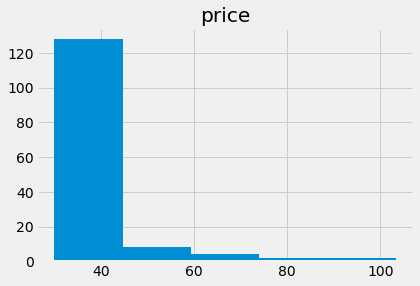

In [28]:
df_32.hist(column="price",bins=5);

### CATEGORY ID: 489756

In [29]:
# CATEGORY ID: 489756
df_48 = df2[df2["category_id"] == 489756]
df_48.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

,category_id,price
count,1658.0000,1658.0000
mean,489756.0000,43.6040
std,0.0000,20.8350
min,489756.0000,10.0000
5%,489756.0000,30.0000
10%,489756.0000,30.0000
25%,489756.0000,32.5966
50%,489756.0000,35.3991
75%,489756.0000,46.0371
80%,489756.0000,49.9783


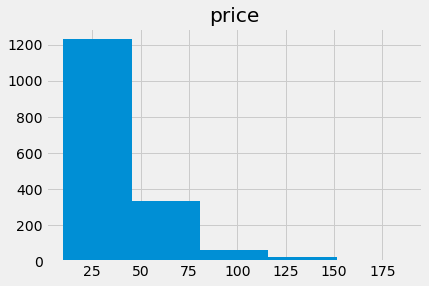

In [30]:
df_48.hist(column="price",bins=5);

---
# Tüm Kategorilere Aynı Fiyat İçin Fiyat Katalogu

<div class="alert alert-success" role="alert">
<p>Bu kısımda kategoriler arasındaki farka bakmaksızın bütün kategoriler için;</p>
<ul>
<li>Güven aralığının <b>en düşük</b> limit değeri:</li>
<li>Güven aralığının <b>orta</b> değeri:</li>
<li>Güven aralığının <b>en yüksek</b> limit değeri:</li>
<li>Kategorilerin <b>mean</b> değerlerinin ortalamaları</li>
<li>Kategorilerin <b>median</b> değerlerinin ortalamaları</li>
    
</ul>
<p>Fiyat kataloguna yarımcı fonksiyonlar ile eklenecek ve sonucunda bu fiyatlara göre olan satışlar simule edilecektir</p>

</div>

In [91]:
# bu fonksiyon kategoriler arasındaki ortalamaların veya medianların ortalamasını alıyor
def fiyat_belirleme(dataframe, category="category_id", target="price", method="median"):
    toplam = 0
    if method == "mean":
        for i in dataframe[category].unique():
            toplam = toplam + dataframe[dataframe[category] == i][target].mean()
    if method == "median":
        for i in dataframe[category].unique():
            toplam = toplam + dataframe[dataframe[category] == i][target].median()   
    return (toplam / dataframe[category].nunique())

## Fiyat: Tüm Kategorilerin Fiyat Listeleri

In [33]:
# Bu fonksiyon ilgili dataframein güven aralıklarını, mean ve median değerlerini bir listeye ekliyor. bu değerler frekans sayıları ile çarpılıp gelir tahmini yapılacak.
def price_list(dataframe,target,liste):
    lower, upper = sms.DescrStatsW(dataframe[target]).tconfint_mean()
    mid = (lower + upper) / 2
    mean = fiyat_belirleme(dataframe, method="mean")
    median = fiyat_belirleme(dataframe, method="median")
    liste.append(lower)
    liste.append(mid)
    liste.append(upper)
    liste.append(mean)
    liste.append(median)
    return liste

In [34]:
aynı_kategori = []
price_list(df2, "price",aynı_kategori)

[39.7838594960083,
 40.398651625339035,
 41.01344375466977,
 37.94444677595247,
 33.837631079516676]

<div class="alert alert-success" role="alert">
<ul>
<li>En düşük limit: 39.7838594960083</li>
<li>Orta limit: 40.398651625339035</li>
<li>Üst limit: 41.01344375466977</li>
<li>Mean değeri: 37.94444677595247</li>
<li>Median değeri: 33.837631079516676</li>

</ul>
</div>

In [35]:
# Bu fonksiyon belirtilen eşik fiyatlarına göre fiyat simülasyonunu çıkarıyor
def gelir_upd(dataframe,target,th):
    frekans = len(dataframe[dataframe[target]>=th]) #güven aralığının eşik noktasından yüksek ve eşit olan satın almaların sayısı
    gelir = frekans * th #gelir hesabı
    return gelir

# TÜM KATEGORİLERE AYNI FİYAT SİMÜLASYONU

In [36]:
def satis_simulasyon(fiyat):
    count=1
    for th in fiyat:
        print(count,"SENARYO | %.4f" %th ,"satış fiyatı için gelir tahmini")
        x = gelir_upd(df2,"price",th)
        print(x)
        print("\n")
        count += 1

In [37]:
satis_simulasyon(aynı_kategori)

1 SENARYO | 39.7839 satış fiyatı için gelir tahmini
34532.390042535204


2 SENARYO | 40.3987 satış fiyatı için gelir tahmini
34177.25927503682


3 SENARYO | 41.0134 satış fiyatı için gelir tahmini
33138.86255377318


4 SENARYO | 37.9444 satış fiyatı için gelir tahmini
35781.61330972318


5 SENARYO | 33.8376 satış fiyatı için gelir tahmini
68013.63846982853




# 📑 SONUÇ

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>Sonuç: </p>
<p>Tüm kategoriler aynı fiyattan düşünülüp güven aralığı oluşturuldu. Güven aralığının verdiği değerler ile bazı sonuçlar alındı.</p>
<ol>
<li>SENARYO güven aralığının alt limit fiyatı için gelir: <strong>34532.39</strong> - Satış Fiyatı(39.7839)</li>
<li>SENARYO güven aralığının ortanca fiyatı için gelir: <strong>34177.26</strong> - Satış Fiyatı (40.3987)</li>
<li>SENARYO güven aralığının üst limit fiyatı için gelir: <strong>33138.86</strong> - Satış Fiyatı (41.0134)</li>

</ol>
<p>Ayrıca tüm kategorilerin median değerlerinin ortalaması ve mean değerlerinin ortalamasına göre bir fiyat belirlendi.</p>
<ol start='4' >
<li>SENARYO kategori meanlerinin ortalamasına göre gelir: <strong>35781.61</strong> - Satış Fiyatı (37.9444)</li>
<li>SENARYO kategori median ortalamalarına göre gelir: <strong>68013.64</strong> - Satış Fiyatı (33.8376)</li>

</ol>
<p>&nbsp;</p>
<p>Sonuç olarak en iyi gelir: kategorilerin medianlarının ortalaması (33.8376) alınarak yapılan satış oldu. 5. SENARYO. GELİR : <strong>68013.64</strong></p>
<p>Güven aralığına göre en iyi sonucu veren satış ise; güven aralığının en alt limiti olan (39.7839) satış fiyatıyla yapılan satış oldu.1. SENARYO GELİR: <strong>34532.39</strong></p>
<p>Fakat burada güven aralığına birbirleriyle farkı olan kategoriler de dahil edildi. Bir sonraki aşamada bunları çıkartacağım.</p>
<p>&nbsp;</p>
</div>

---
# Farklılık olmayanlara aynı, farklı olan kategorilere ayrı fiyat politikası

In [38]:
# birbirleriyle arasında istatistiksel olarak fark olmayan grupları çekiyorum
df_36= df2[df2["category_id"]==361254]
df_87= df2[df2["category_id"]==874521]
df_67= df2[df2["category_id"]==675201]
df_20= df2[df2["category_id"]==201436]

In [39]:
# bu grupları bir dataframede topluyorum
benzer = pd.concat([df_36, df_87, df_67, df_20], axis=0, sort=False)

In [40]:
benzer["category_id"].value_counts()

874521    728
361254    615
675201    129
201436     97
Name: category_id, dtype: int64

<div class="alert alert-success" role="alert">
<p>Bu kısımda kategoriler arasındaki farklardan dolayı;</p>
<p>Aralarında istatistiksel olarak farklılık göstermeyen gruplara kendi içerisinde, diğer gruplar ile farklılık gösteren gruplara kendi içerisinde fiyat politikası uygulanmıştır.</p>
<p>Sırasıyla fiyat katalogu:</p>
<ul>
<li>Güven aralığının <strong>en düşük</strong> limit değeri:</li>
<li>Güven aralığının <strong>orta</strong> değeri:</li>
<li>Güven aralığının <strong>en yüksek</strong> limit değeri:</li>
<li>Kategorilerin <strong>mean</strong> değerlerinin ortalamaları</li>
<li>Kategorilerin <strong>median</strong> değerlerinin ortalamaları</li>

</ul>

</div>

Ayrı ayrı kategorilerin fiyat katalogunu oluşturuyorum

In [41]:
# birbirleriyle farklılık bulunmayan kategorilerin fiyat katalogu
benzer_list = []
price_list(benzer,"price",benzer_list)

[36.710959789791794,
 37.44336139203231,
 38.17576299427282,
 37.09238177238653,
 33.9801643426125]

In [42]:
# Category 326584 için fiyat eşikleri
df_32_list = []
price_list(df_32,"price",df_32_list)

[33.709933231454606,
 35.693170414655555,
 37.6764075978565,
 35.69317041465555,
 31.706022729350003]

In [43]:
# Category 489756 için fiyat eşikleri
df_48_list = []
price_list(df_48,"price",df_48_list)

[42.60036956376109,
 43.60398315151311,
 44.607596739265134,
 43.60398315151315,
 35.3991063773]

In [44]:
# birbirleriyle farklı olmayan
gelir_benzer = []
for th in benzer_list:
    gelir1 = gelir_upd(benzer,"price",th)
    gelir_benzer.append(gelir1)
gelir_benzer = np.array(gelir_benzer)

# kategori 326584
gelir_32 = []
for th in df_32_list:
    gelir2 = gelir_upd(df_32,"price",th)
    gelir_32.append(gelir2)
gelir_32 = np.array(gelir_32)

#kategori 489756 
gelir_48 = []
for th in df_48_list:
    gelir3 = gelir_upd(df_48,"price",th)
    gelir_48.append(gelir3)
gelir_48 = np.array(gelir_48)
gelirler = gelir_benzer + gelir_32 + gelir_48
gelirler

array([34417.45714084, 31887.9143478 , 30389.26833956, 32345.67480126,
       59968.14988503])

In [45]:
def satis_show(fiyat):
    count=1
    for i in range(0,5):
        print(count,"SENARYO | gelir tahmini")
        print(gelirler[i])
        print("\n")
        count += 1

In [46]:
satis_show(gelirler)

1 SENARYO | gelir tahmini
34417.457140842096


2 SENARYO | gelir tahmini
31887.91434779769


3 SENARYO | gelir tahmini
30389.268339557522


4 SENARYO | gelir tahmini
32345.67480126304


5 SENARYO | gelir tahmini
59968.14988503372




# 📑 SONUÇ

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>Bu kısımda kategoriler arasındaki farklardan dolayı;</p>
<p>Aralarında istatistiksel olarak farklılık göstermeyen gruplara kendi içerisinde, diğer gruplar ile farklılık gösteren gruplara kendi içerisinde fiyat politikası uygulanmıştır. Oluşan fiyat kataloğuna göre satış tahminleri sırasıyla:</p>
<ol>
<li>SENARYO güven aralığının alt limit fiyatı için gelir: <strong>34417.4571</strong> </li>
<li>SENARYO güven aralığının ortalama fiyatı için gelir: <strong>31887.9143</strong> </li>
<li>SENARYO güven aralığının üst limit fiyatı için gelir: <strong>30389.2683</strong> </li>

</ol>
<p>Ayrıca tüm kategorilerin median değerlerinin kendi içerisinde ortalaması ve mean değerlerinin kendi ortalamasına göre bir fiyat belirlendi.</p>
<ol start='4' >
<li>SENARYO kategori mean ortalamalarına göre gelir: <strong>32345.6748</strong> -</li>
<li>SENARYO kategori median ortalamalarına göre gelir: <strong>59968.1498</strong> </li>

</ol>
<p>&nbsp;</p>
<p>Sonuç olarak en iyi gelir: kategorilerin kendisi ve kendi aralarındaki medianlarının ortalaması alınarak yapılan satış oldu. 5. SENARYO. GELİR : <strong>59968.1498</strong></p>
<p>Güven aralığına göre en iyi sonucu veren satış ise; kategorilerin kendi güven aralığının en alt limiti  satış fiyatıyla yapılan satış oldu.1. SENARYO GELİR: **34417.4571</p>
</div>

---
# Birbirleriyle Aynı olan kategorilere göre fiyat belirlenmesi

Bu durumda birbirleriyle istatistiksel olarak fark olmayan kategorilerin değerlerinden fiyat katalogu seçilmiş, farklılık gösteren kategorilere de bu fiyat yapılandırmaları uygulanmıştır.

In [47]:
last_step = []
price_list(benzer, "price",last_step)

[36.710959789791794,
 37.44336139203231,
 38.17576299427282,
 37.09238177238653,
 33.9801643426125]

In [48]:
satis_simulasyon(last_step)

1 SENARYO | 36.7110 satış fiyatı için gelir tahmini
38436.37489991201


2 SENARYO | 37.4434 satış fiyatı için gelir tahmini
36956.59769393589


3 SENARYO | 38.1758 satış fiyatı için gelir tahmini
35388.93229569091


4 SENARYO | 37.0924 satış fiyatı için gelir tahmini
37611.67511719994


5 SENARYO | 33.9802 satış fiyatı için gelir tahmini
67076.84441231706




# 📑 SONUÇ

<div class="alert alert-block alert-info" style="margin-top: 20px">
<p>İstatistiksel olarak aralarında farklılık bulunmayan grupların fiyatlarına göre güven aralığı belirlendi ve tüm fiyat politikası bu kategorilerin değerlerine göre yapıldı.</p>
<ol>
<li>SENARYO güven aralığının alt limit fiyatı için gelir: <strong>38436.3748</strong> </li>
<li>SENARYO güven aralığının ortanca fiyatı için gelir: <strong>36956.5976</strong> </li>
<li>SENARYO güven aralığının üst limit fiyatı için gelir: <strong>35388.9322</strong> </li>

</ol>
<p>Ayrıca tüm kategorilerin median değerlerinin kendi içerisinde ortalaması ve mean değerlerinin kendi ortalamasına göre bir fiyat belirlendi.</p>
<ol start='4' >
<li>SENARYO kategori meanlerinin ortalamasına göre gelir: <strong>37611.6751</strong> </li>
<li>SENARYO kategori median ortalamalarına göre gelir: <strong>67076.8444</strong> </li>

</ol>
<p>&nbsp;</p>
<p>Sonuç olarak en iyi gelir: farklılık göstermeyen kategorilerin medianlarının ortalaması alınarak yapılan satış oldu. 5. SENARYO. GELİR : <strong>67076.8444</strong></p>
<p>Güven aralığına göre en iyi sonucu veren satış ise; farklılık göstermeyen kategorilerin fiyatlarının güven aralığının en alt limiti satış fiyatıyla yapılan satış oldu.1. SENARYO GELİR: <strong>38436.3748</strong></p>
</div>

# 🗒 ÖZET

<div class="alert alert-warning" role="alert" style="margin-top: 20px">
<p><strong>Fiyat Katalogları için olası senaryolar incelenmiş en iyi satış miktarları aşağıdaki durumlarda gözlemlenmiştir</strong></p>
<hr />
    <p><strong>Güven Aralığı Çerçevesinde</strong></p>
<p>İstatistiksel olarak aralarında farklılık bulunmayan grupların fiyatlarına göre güven aralığı belirlendi ve tüm fiyat politikası bu kategorilerin değerlerine göre yapıldı.</p>
<p>Güven Aralığının alt limit fiyatı için gelir: <strong>38436.3748</strong> - Satış Fiyatı : 36.710959</p>
<hr />
<p><strong>Güven Aralığının Dışarısında - İstatistiksel olarak anlamlı olmayan geliri yüksek nokta:</strong></p>
<p>Tüm kategoriler aynı fiyattan düşünülüp güven aralığı oluşturuldu.</p>
<p>
Kategori median ortalamalarına göre gelir: <strong>68013.64</strong> - Satış Fiyatı (33.8376)</p>

<hr />    
<p>Güven Aralığı çerçevesinde tüm senaryolarda en yüksek gelirler <strong>güven düzeyinin alt sınır noktasından</strong> elde edildi.</p>
<p>En yüksek gelir: 95% Güven Aralığının alt limit fiyatı için gelir: <strong>38436.3748</strong> - Satış Fiyatı : 36.710959</p>
<p>Yeni bir test verisi ile güven aralığının dışarısındaki <strong>yüksek gelir getiren fiyatlar</strong> test edilebilir.</p>
</div>